In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib.pyplot
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.w

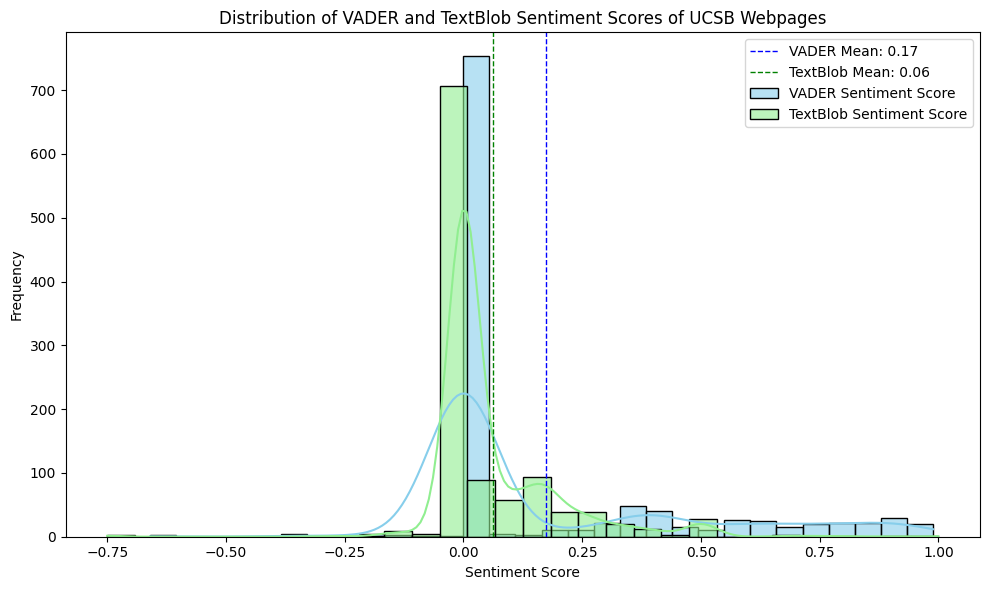

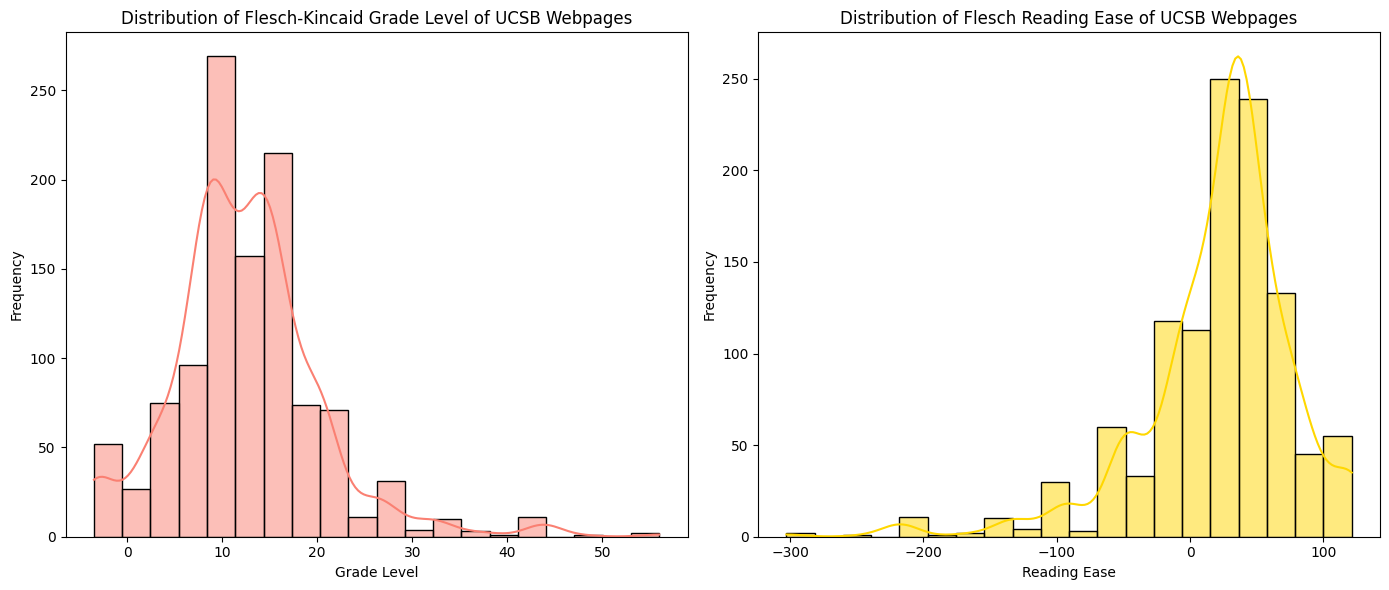

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file (make sure to provide the correct path to your CSV file)
df = pd.read_csv('/Users/keyapanchal/Documents/GitHub/UC-Website-Analysis-Project/results/UCSB_readability_analysis.csv')

# Distribution of Sentiment Scores (VADER Sentiment Score and TextBlob Sentiment Score)
def plot_sentiment_distribution():
    plt.figure(figsize=(10, 6))
    
    # Plot overlapping histograms for VADER and TextBlob Sentiment Scores
    sns.histplot(df['VADER Sentiment Score'], kde=True, color='skyblue', label='VADER Sentiment Score', bins=30, alpha=0.6)
    sns.histplot(df['TextBlob Sentiment Score'], kde=True, color='lightgreen', label='TextBlob Sentiment Score', bins=30, alpha=0.6)

    # Add mean lines
    vader_mean = df['VADER Sentiment Score'].mean()
    textblob_mean = df['TextBlob Sentiment Score'].mean()
    plt.axvline(vader_mean, color='blue', linestyle='dashed', linewidth=1, label=f'VADER Mean: {vader_mean:.2f}')
    plt.axvline(textblob_mean, color='green', linestyle='dashed', linewidth=1, label=f'TextBlob Mean: {textblob_mean:.2f}')

    # Add titles and labels
    plt.title('Distribution of VADER and TextBlob Sentiment Scores of UCSB Webpages')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')

    # Display legend
    plt.legend()

    plt.tight_layout()
    plt.show()

# Distribution of Flesch-Kincaid Readability Ease/Grade Level Scores
def plot_readability_scores():
    # Combine the two readability scores in one figure
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Flesch-Kincaid Grade Level
    sns.histplot(df['Flesch-Kincaid Grade Level'], kde=True, bins=20, color='salmon', ax=ax[0])
    ax[0].set_title('Distribution of Flesch-Kincaid Grade Level of UCSB Webpages')
    ax[0].set_xlabel('Grade Level')
    ax[0].set_ylabel('Frequency')

    # Flesch Reading Ease
    sns.histplot(df['Flesch Reading Ease'], kde=True, bins=20, color='gold', ax=ax[1])
    ax[1].set_title('Distribution of Flesch Reading Ease of UCSB Webpages')
    ax[1].set_xlabel('Reading Ease')
    ax[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the functions to plot
plot_sentiment_distribution()
plot_readability_scores()

/var/folders/vs/w1q08v4j12g56n5xj8559gbr0000gn/T/ipykernel_26003/2844524410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Website_Type', y='Missing_URL', data=missing_data, palette='viridis')


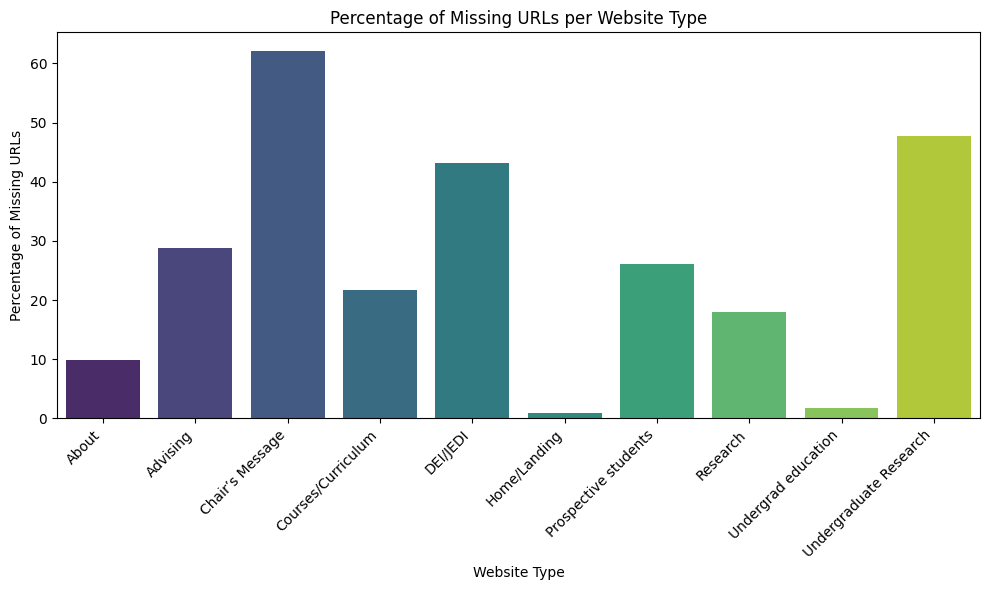

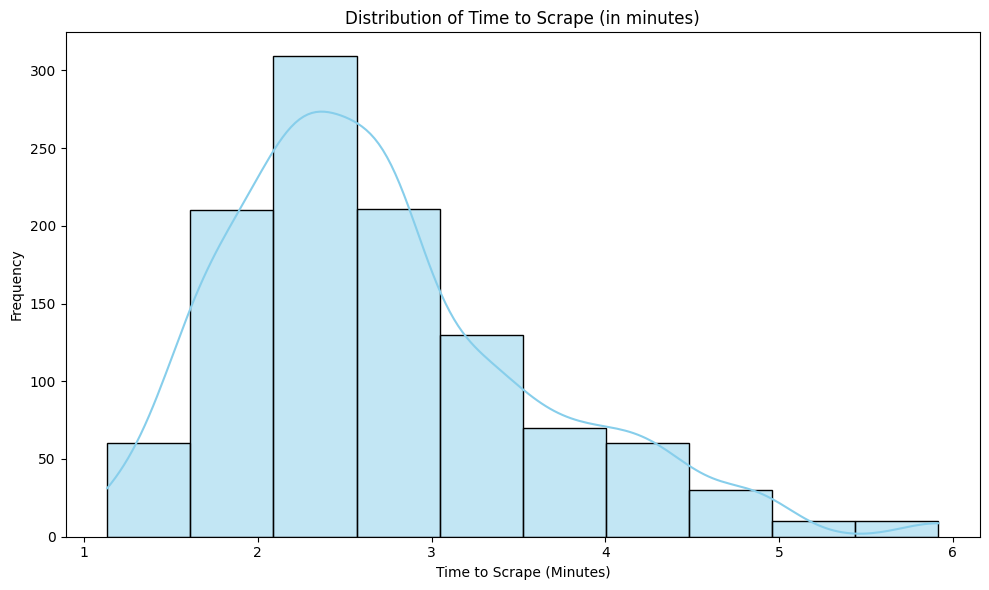

In [ ]:
# Read the CSV file (make sure to provide the correct path to your CSV file)
ALLcsv = pd.read_csv('/Users/keyapanchal/Documents/GitHub/UC-Website-Analysis-Project/data/Website_Analysis_Tracking - ALL.csv')

# Measure missingness of URL for each Website_Type (where URL is empty)
ALLcsv['Missing_URL'] = ALLcsv['URL'].isnull() | (ALLcsv['URL'] == '')  # Mark rows with missing URL

# Calculate the percentage of missing URLs per Website_Type
missing_data = ALLcsv.groupby('Website_Type')['Missing_URL'].mean().reset_index()
missing_data['Missing_URL'] *= 100  # Convert to percentage

# Plot the percentage of missing URLs per Website_Type
def plot_missingness():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Website_Type', y='Missing_URL', data=missing_data, palette='viridis')
    plt.title('Percentage Missing per Website Type')
    plt.xlabel('Website Type')
    plt.ylabel('Percentage of Missing URLs')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Convert Time_to_Scrape (HH:MM) to total minutes
def time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == '':
        return None  # Return None for missing values
    # Split time by the colon to separate hours, minutes, and seconds
    time_parts = time_str.split(':')
    # If the time has two parts (minutes and seconds)
    if len(time_parts) == 2:
        minutes = int(time_parts[0])
        seconds = float(time_parts[1])
        total_minutes = minutes + (seconds / 60)
    # If the time has three parts (hours, minutes, and seconds)
    elif len(time_parts) == 3:
        hours = int(time_parts[0])
        minutes = int(time_parts[1])
        seconds = float(time_parts[2])
        total_minutes = (hours * 60) + minutes + (seconds / 60)
    else:
        return None  # If the format is unexpected, return None
    return total_minutes

ALLcsv['Time_to_Scrape_Minutes'] = ALLcsv['Time_to_Scrape'].apply(time_to_minutes)

def plot_scraping_time():
    plt.figure(figsize=(10, 6))
    sns.histplot(ALLcsv['Time_to_Scrape_Minutes'].dropna(), kde=True, color='skyblue', bins=10)
    plt.title('Distribution of Time to Scrape (in minutes)')
    plt.xlabel('Time to Scrape (Minutes)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_missingness()
plot_scraping_time()

/var/folders/vs/w1q08v4j12g56n5xj8559gbr0000gn/T/ipykernel_758/3014406805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Institution', y='VADER Sentiment Score', data=ALL_analysis, palette='Set2')


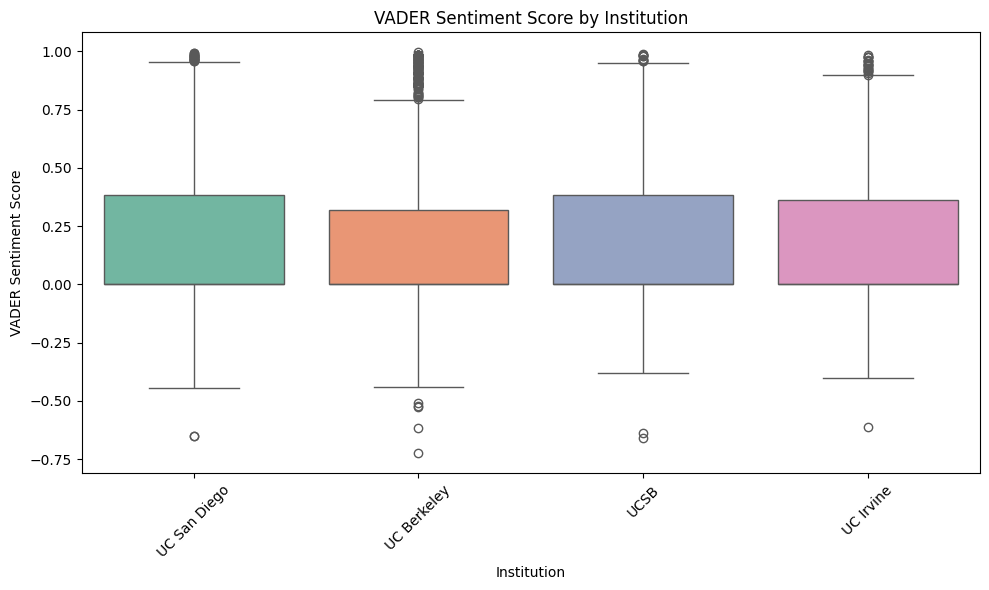

/var/folders/vs/w1q08v4j12g56n5xj8559gbr0000gn/T/ipykernel_758/3014406805.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Institution', y='Flesch-Kincaid Grade Level', data=ALL_analysis, palette='Set2')


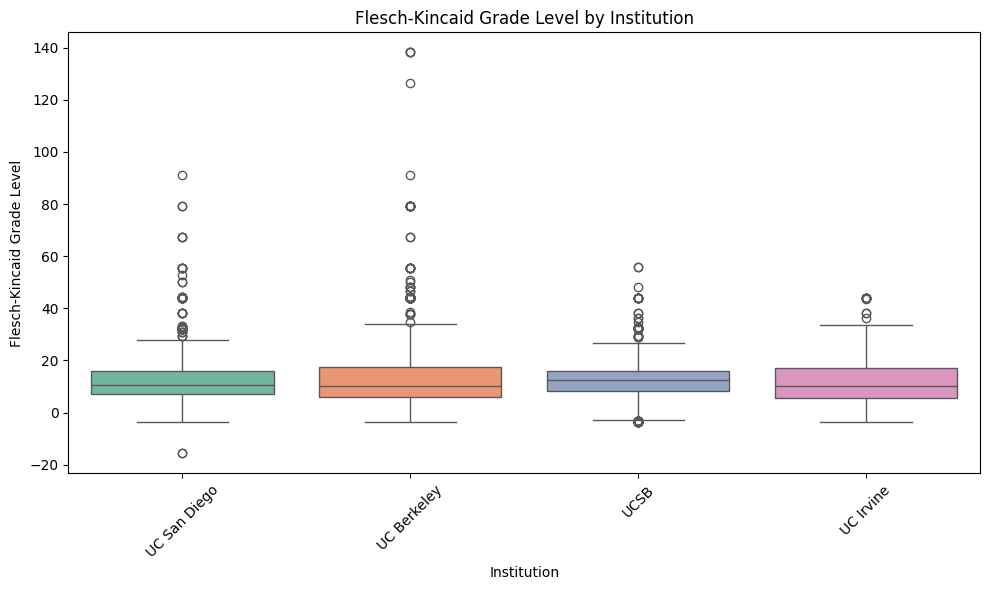

In [5]:
ALL_analysis = pd.read_csv('/Users/keyapanchal/Documents/GitHub/UC-Website-Analysis-Project/results/ALL_readability_analysis.csv')

# Boxplot for VADER Sentiment Score
def plot_sentiment_boxplot():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Institution', y='VADER Sentiment Score', data=ALL_analysis, palette='Set2')
    plt.title('VADER Sentiment Score by Institution')
    plt.xlabel('Institution')
    plt.ylabel('VADER Sentiment Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Boxplot for Flesch-Kincaid Grade Level
def plot_gradelevel_boxplot():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Institution', y='Flesch-Kincaid Grade Level', data=ALL_analysis, palette='Set2')
    plt.title('Flesch-Kincaid Grade Level by Institution')
    plt.xlabel('Institution')
    plt.ylabel('Flesch-Kincaid Grade Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_sentiment_boxplot()
plot_gradelevel_boxplot()